# EDA

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## clean data

In [28]:
features_df = pd.read_csv("data/Training_Features.csv", index_col="respondent_id")
labels_df = pd.read_csv("data/Training_Labels.csv", index_col="respondent_id")

In [199]:
features_df.corr()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
h1n1_concern,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,0.150206,...,0.033562,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525
h1n1_knowledge,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,0.093829,...,0.170252,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583
behavioral_antiviral_meds,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,...,0.009465,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822
behavioral_avoidance,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,...,0.001180,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328
behavioral_face_mask,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,...,0.069992,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826
behavioral_wash_hands,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,...,0.053761,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764
behavioral_large_gatherings,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,...,-0.032319,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449
behavioral_outside_home,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,...,-0.034619,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558
behavioral_touch_face,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.088221,...,0.067648,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606
doctor_recc_h1n1,0.150206,0.093829,0.051235,0.068145,0.084282,0.088729,0.082242,0.070346,0.088221,1.000000,...,0.101639,0.067157,0.152305,0.262826,0.113111,0.107512,0.202320,0.057128,0.004112,0.029040


In [29]:
# training data
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [183]:
features_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [186]:
features_df['health_insurance'].value_counts()


1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [189]:
features_df['employment_industry'].value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [190]:
features_df['employment_occupation'].value_counts()

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

In [31]:
# prediction target
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


In [180]:
# about 21% of people received the h1n1 vaccine

labels_df["h1n1_vaccine"].value_counts(normalize=True)*100

0    78.754634
1    21.245366
Name: h1n1_vaccine, dtype: float64

In [37]:
# about 47% of people received the h1n1 vaccine

labels_df["seasonal_vaccine"].value_counts(normalize=True)*100

0    53.439173
1    46.560827
Name: seasonal_vaccine, dtype: float64

## target variables are h1n1 and seasonal
- about half of respondents received the seasonal vaccine, but only about 20% received the h1n1
- seasonal has balanced classes but h1n1 has imbalanced classes

In [45]:
train_df = features_df.join(labels_df)
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [200]:
train_df.corr()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
h1n1_concern,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,0.150206,...,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929,0.154828
h1n1_knowledge,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,0.093829,...,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951,0.120152
behavioral_antiviral_meds,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,...,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608,0.006277
behavioral_avoidance,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,...,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690,0.076395
behavioral_face_mask,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,...,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498,0.050083
behavioral_wash_hands,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,...,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712,0.112414
behavioral_large_gatherings,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,...,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822,0.064025
behavioral_outside_home,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,...,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768,0.053509
behavioral_touch_face,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.088221,...,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648,0.120228
doctor_recc_h1n1,0.150206,0.093829,0.051235,0.068145,0.084282,0.088729,0.082242,0.070346,0.088221,1.000000,...,0.152305,0.262826,0.113111,0.107512,0.202320,0.057128,0.004112,0.029040,0.393890,0.198607


In [59]:
h1n1_counts = train_df[['h1n1_concern', 'h1n1_vaccine']].groupby(['h1n1_concern', 'h1n1_vaccine']).size().unstack()
h1n1_counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


<AxesSubplot:xlabel='h1n1_concern'>

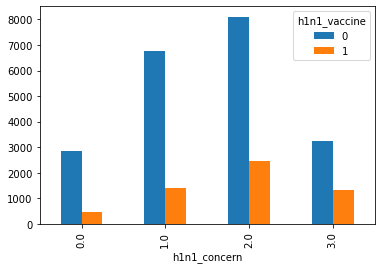

In [73]:
h1n1_counts.plot.bar()

In [70]:
h1n1_perc = h1n1_counts.div(h1n1_counts.sum(axis='columns'), axis='index')
h1n1_perc

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


<AxesSubplot:xlabel='h1n1_concern'>

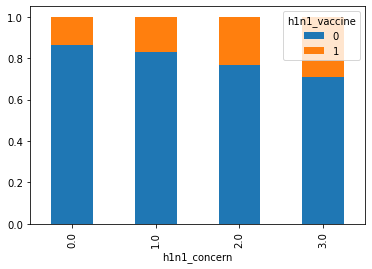

In [74]:
h1n1_perc.plot.bar(stacked=True)

In [119]:
def vax_perc_plot(features, target):
    for feature in features:
        counts = train_df[[feature, target]].groupby([feature, target]).size().unstack()
        perc = counts.div(counts.sum(axis='columns'), axis='index')
        perc.plot.bar(stacked=True)

In [128]:
cols_vax = ['h1n1_concern',
            'h1n1_knowledge',
            'opinion_h1n1_vacc_effective',
            'opinion_h1n1_risk',
            'opinion_h1n1_sick_from_vacc',
            'opinion_seas_vacc_effective',
            'opinion_seas_risk',
            'opinion_seas_sick_from_vacc']

cols_behavioral = ['behavioral_antiviral_meds',
                   'behavioral_avoidance',
                   'behavioral_face_mask',
                   'behavioral_wash_hands',
                   'behavioral_large_gatherings',
                   'behavioral_outside_home',
                   'behavioral_touch_face']          

cols_med = ['doctor_recc_h1n1',
            'doctor_recc_seasonal',
            'chronic_med_condition',
            'child_under_6_months',
            'health_worker',
            'health_insurance',]

cols_demo = ['age_group',
             'education',
             'race',
             'sex',
             'marital_status',
             'employment_status',
             'employment_industry',
             'employment_occupation',
             'income_poverty',
             'rent_or_own',
             'hhs_geo_region',
             'census_msa',
             'household_adults',
             'household_children']

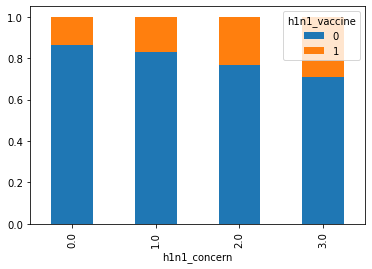

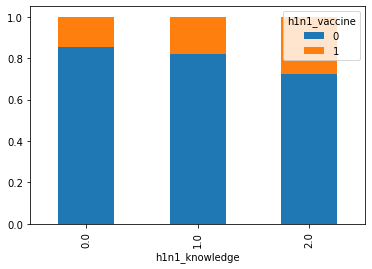

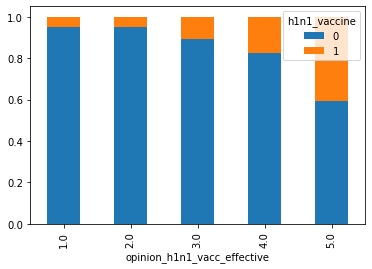

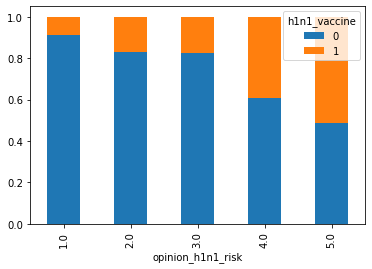

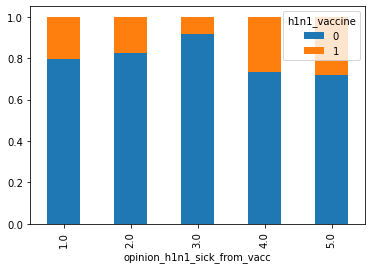

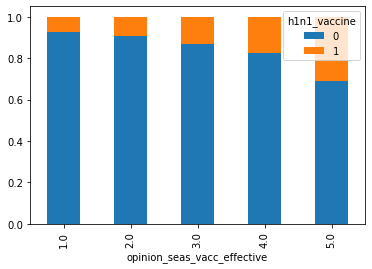

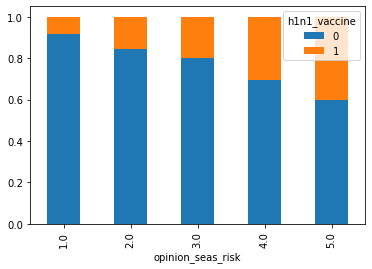

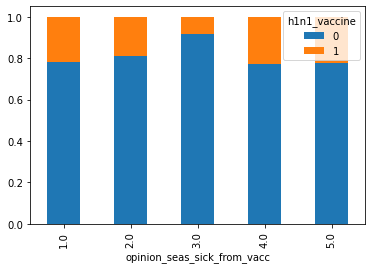

In [121]:
vax_perc_plot(cols_vax, 'h1n1_vaccine')

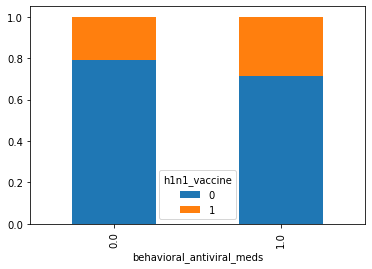

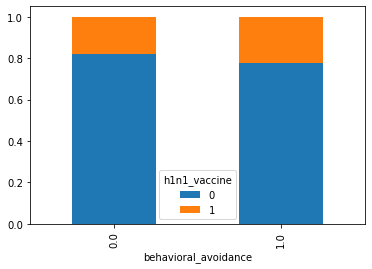

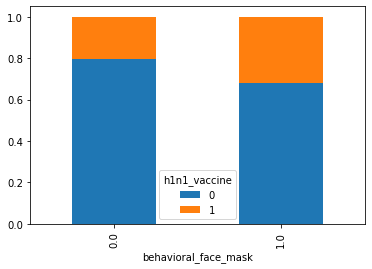

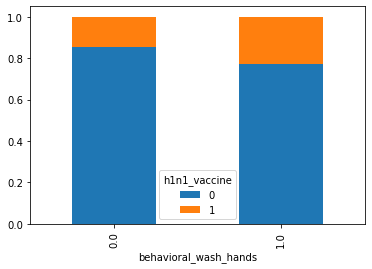

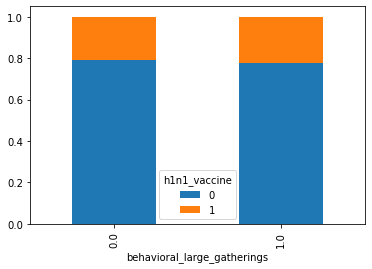

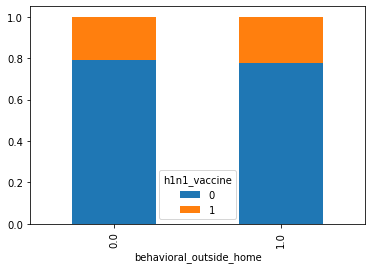

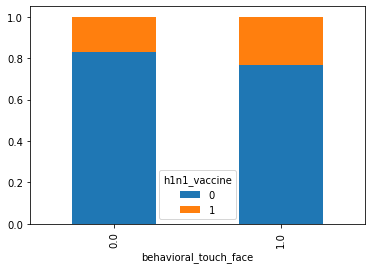

In [122]:
vax_perc_plot(cols_behavioral, 'h1n1_vaccine')

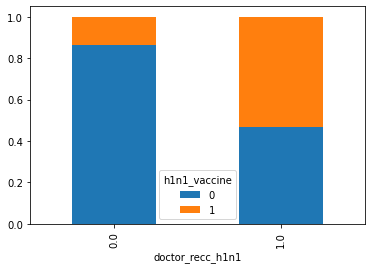

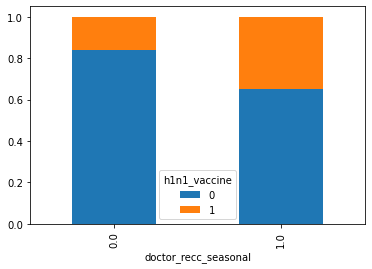

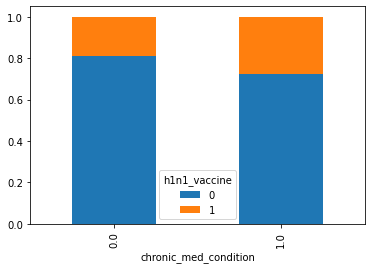

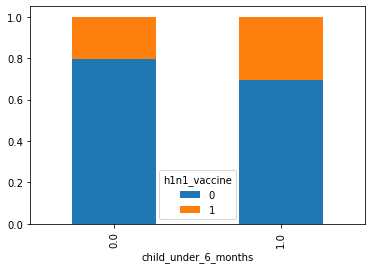

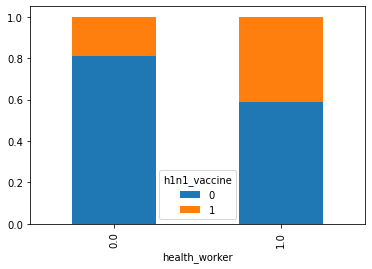

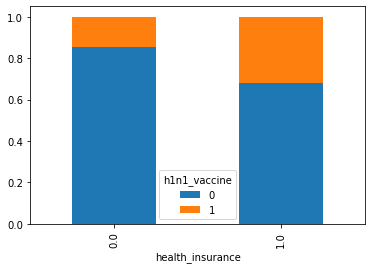

In [123]:
vax_perc_plot(cols_med, 'h1n1_vaccine')

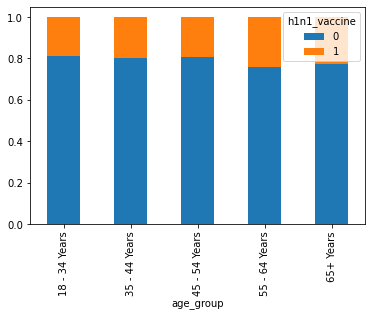

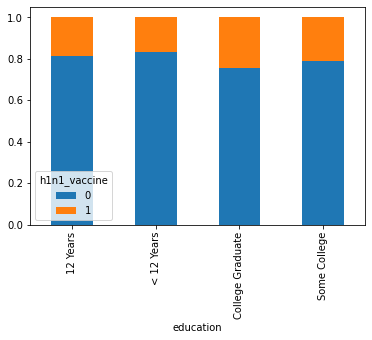

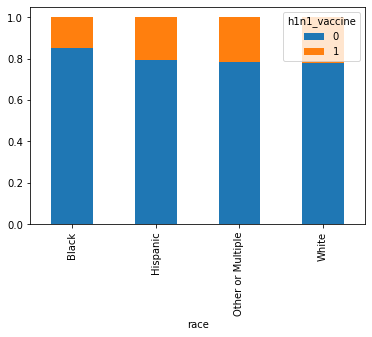

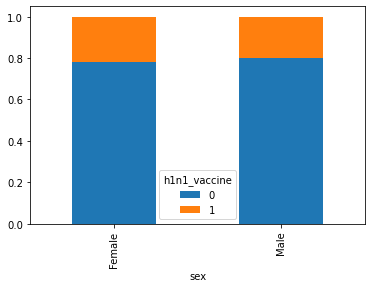

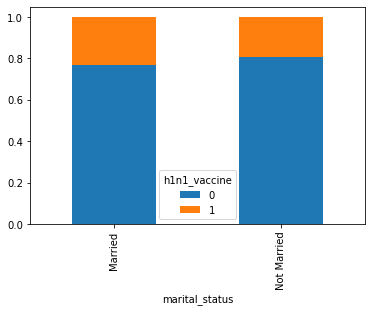

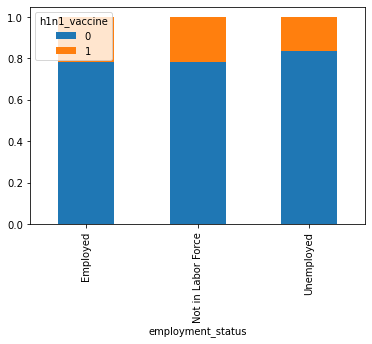

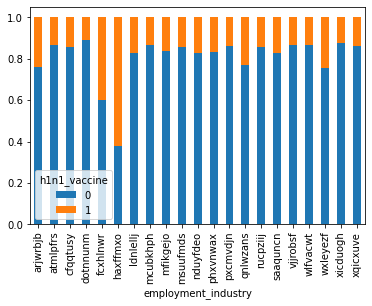

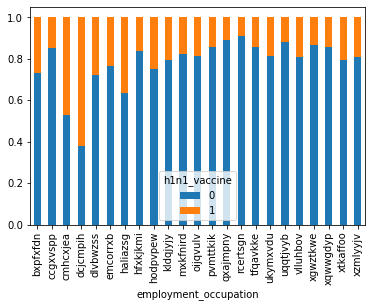

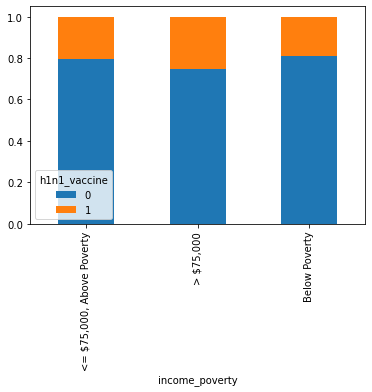

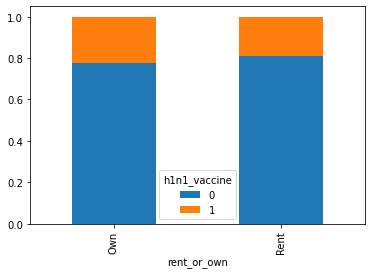

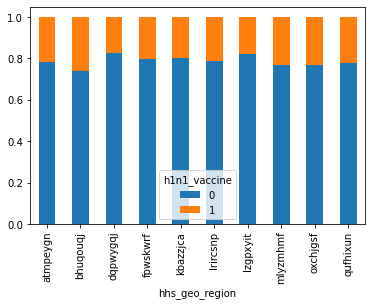

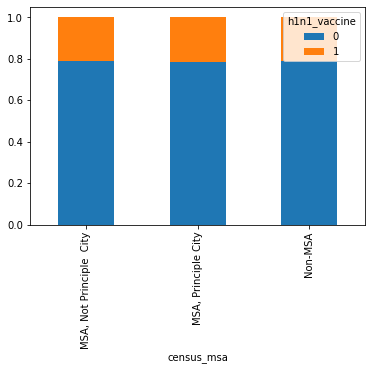

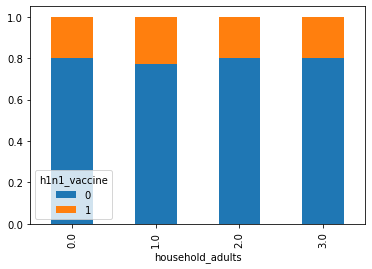

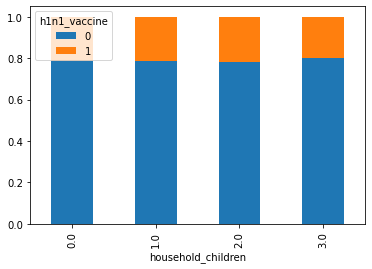

In [129]:
vax_perc_plot(cols_demo, 'h1n1_vaccine')

In [ ]:
def vax_perc_plot(features, targets):
    plt.subplots(nrows=len(features), ncols=len(targets))
    
    for i, feature in enumerate(features):
        for j, target in enumerate(targets):
            plt.subplot(len(features), len(targets))
            counts = train_df[[feature, target]].groupby([feature, target]).size().unstack()
            perc = counts.div(counts.sum(axis='columns'), axis='index')
            perc.plot.bar(stacked=True)


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [174]:
X = features_df
y = labels_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# dummy classifier to predict most frequent class
dummy = DummyClassifier(strategy='most_frequent')

dummy.fit(X_train, y_train)

# predictions on the test set
y_pred_dummy = dummy.predict(X_test)

In [175]:
accuracy_score(y_test, y_pred_dummy)

0.5027229407760381

In [179]:
print(classification_report(y_test, y_pred_dummy))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1868
           1       0.00      0.00      0.00      4044

   micro avg       0.00      0.00      0.00      5912
   macro avg       0.00      0.00      0.00      5912
weighted avg       0.00      0.00      0.00      5912
 samples avg       0.00      0.00      0.00      5912



In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression



from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score



In [143]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.33, random_state=22)

In [198]:
numeric_cols = features_df.select_dtypes(['number']).columns.to_list()
numeric_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [156]:
# preprocessing

num_preprocessing = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", num_preprocessing, numeric_cols)
        ],
        remainder="drop"
        )

In [163]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [168]:
pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('estimators', estimators),
])

In [169]:
pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outside_home'...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'househo

In [172]:
pipeline.fit(X_train, y_train)
pipeline.predict_proba(X_test)

[array([[0.24333958, 0.75666042],
        [0.52566363, 0.47433637],
        [0.83559892, 0.16440108],
        ...,
        [0.41692231, 0.58307769],
        [0.96559606, 0.03440394],
        [0.50861038, 0.49138962]]),
 array([[0.27268671, 0.72731329],
        [0.25635064, 0.74364936],
        [0.06711918, 0.93288082],
        ...,
        [0.24862549, 0.75137451],
        [0.90899621, 0.09100379],
        [0.24096932, 0.75903068]])]

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()